# Chapter 2. Supervised Learning methods.
# Part 6. Kernelized SVM (Support Vector Machines).

In this Part will be reviewed SVC (Support Vector Classificator) but there is also SVR (Support Vector Regressor) and all the principles also appliable to it.

## - Some datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

## Forge dataset (artificial)

In [4]:
#taking datasets
X, y = mglearn.datasets.make_forge()
X.shape

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)

Text(0, 0.5, 'Second feature')

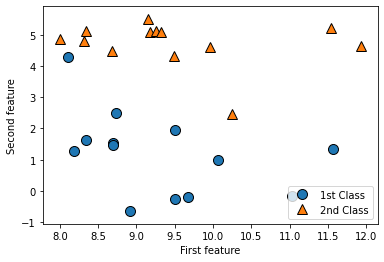

In [5]:
#building plot
#%matplotlib inline #allows to add plots to the browser inteface
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #plot building

plt.legend(["1st Class", "2nd Class"], loc=4) #legend
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Wave dataset (artificial)

In [6]:
#taking datasets
X, y = mglearn.datasets.make_wave(n_samples =40)
X.shape

(40, 1)

Text(0, 0.5, 'Target value')

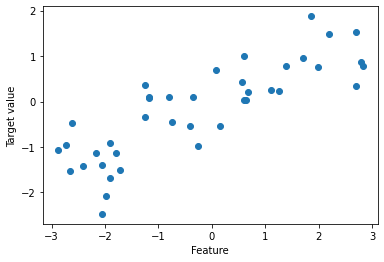

In [7]:
#building plot
plt.plot(X, y, 'o')

plt.xlabel("Feature")
plt.ylabel("Target value")

## Cancer dataset (natural)

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(cancer.keys())
print(cancer.data.shape)
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
#building a hash table to examine dataset
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

## Boston Housing dataset (natural)

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

In [12]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


## Boston Housing extended dataset (natural)

In [13]:
X, y = mglearn.datasets.load_extended_boston()

#104 features are previous 13 default features...
#...plus 91 derivative features
X.shape

(506, 104)

## - Linear SVM and Nonlinear features (dimension increasing)

Linear models can't always correctly separate data to classify them:

train accuracy: 0.6266666666666667
test accuracy: 0.76


/home/akado/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


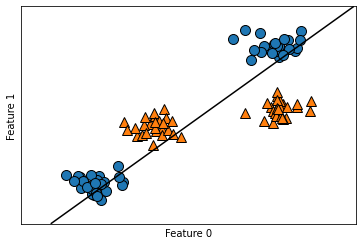

In [132]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#loading dataset and splitting
X, y = make_blobs(centers=4, random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=4)

#making it binary
y, y_train, y_test = y%2, y_train%2, y_test%2

#model initialization and building
linear_svm = LinearSVC().fit(X,y)

#visualization of dataset and decision border
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#model validation
print('train accuracy: {}'.format(linear_svm.score(X_train, y_train)))
print('test accuracy: {}'.format(linear_svm.score(X_test, y_test)))

A probable solution is to increase dimensions in dataset by adding another feature as a expression of given ones:

<ipython-input-100-cca4690d6a1d>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'Feature 1^2')

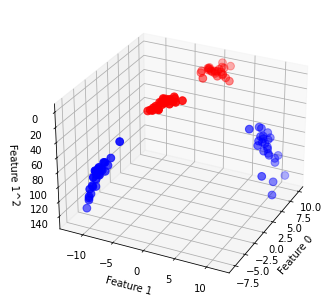

In [100]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

#adding another feature as a square of a given one
X_new = np.hstack([ X, X[:, 1:]**2 ])

#-----visualizing samples in new space
figure = plt.figure()
#creating plot object
ax = Axes3D(figure, elev=-152, azim=-26)

#-----visualizing samples
mask = y==0
#visualizing y==0 samples
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', s=60)
#visualizing y==1 samples
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', s=60)

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1^2')

^ As an illustration, now Linear SVM is able to make a correct decision plane (linear function)

Applying Linear SVC to the new dataset

/home/akado/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-131-8dae3106055b>:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Train accuracy: 1.0
Test accuracy: 1.0


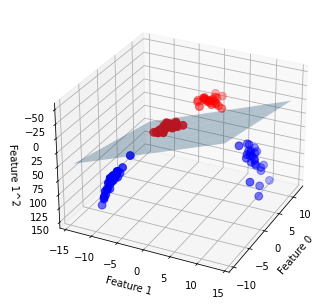

In [131]:
#-----dataset splitting
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, stratify=y, random_state=4)

#-----model initialization and building
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#-----rendering plot with decision plane
figure = plt.figure()

#--creating plot object
ax = Axes3D(figure, elev=-152, azim=-26)

#--decision plane rendering
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)
#'np.meshgrid' in this case creates cords needed to render plane
XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)

#--visualizing y==0 samples
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', s=60)
#--visualizing y==1 samples
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', s=60)

#--misc
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1^2')

#-----model validation
print('Train accuracy: {}'.format(linear_svm_3d.score(X_new_train, y_train)))
print('Test accuracy: {}'.format(linear_svm_3d.score(X_new_test, y_test)))